<table align="left" width=100%>
    <tr>
        <td width="15%">
            <img src="faculty.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                  <b> Faculty Notebook <br> Session 1 :NLP Introduction and Basics of Text Pre-processing  </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Table of Contents
1.  **[Text Standardization](#TextStandardization)**
    - 1.1 [Case Conversion](#CaseConversion)
    - 1.2 [Spelling Correction](#SpellingCorrection)<br></br>    
2.  **[Text Normalization ](#TextNormalization)**
    - 2.1 [Stemming](#Stemming)
    - 2.2 [Parts Of Speech(POS) tagging](#POStagging)
    - 2.3 [Lemmatization](#Lemmatization)<br></br>   
3.  **[Eliminate Unessential Items from Text ](#TextElimination)**
    - 3.1 [Removing Spaces](#RemovingSpaces)
    - 3.2 [Removing Digits](#RemovingDigits)
    - 3.3 [Removing Stopwords](#RemovingStopwords) 
    - 3.4 [Removing Punctuations](#RemovingPunctuations)
    - 3.5 [Removing URLs](#RemovingHTMLTags) 
    - 3.6 [Removing Accented Characters](#RemovingAccentedCharacters)<br></br>   
4.  **[Working with Emoji](#WorkingwithEmoji)**<br></br>
5.  **[Web Scrapping: Text Extraction from web Page](#WebScrapping)**<br></br> 
6.  **[Text Extraction](#TextExtraction)**
    - 6.1 [Extracting Text from PDF File](#TextExtractionformPDF)
    - 6.2 [Extracting Text from IMAGE File](#TextExtractionformImages)<br></br>
7.  **[Name Entity Recognition (NER)](#NER)**<br></br>
8.  **[Dependancy Parcing](#DependancyParcing)**<br></br>
9.  **[Word Cloud](#WordCloud)**<br></br> 
10. **[Sentiment Analysis using Textblob](#SentimentAnalysis)**<br></br>

# Text Processing

<a id="TextStandardization"> </a>
### 1. Text Standardization

<a id="CaseConversion"> </a>
#### 1.1. Case Conversion 

In [1]:
# converting to lower case 
text = " Lets Start learning NLP"
# python inbuild function
text = text.lower()
text

' lets start learning nlp'

<a id="SpellingCorrection"> </a>
#### 1.2. Spelling Correction

In [2]:
# !pip install pyspellchecker
from spellchecker import SpellChecker
def correct_spellings(text):
    spell = SpellChecker()
    corrected_words = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_words.append(spell.correction(word))
        else:
            corrected_words.append(word)
    return " ".join(corrected_words)

text = "this is speling correct tst"
print (correct_spellings(text))


this is spelling correct test


<a id="TextNormalization"> </a>
### 2. Text Normalization  



<a id="Stemming"> </a>
#### 2.1 Stemming  

In [3]:
import nltk
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

simple_stemmer("My system keeps crashing his crashed yesterday, ours crashes daily")

'my system keep crash hi crash yesterday, our crash daili'

<a id="POStagging"> </a>
#### 2.2 Parts Of Speech(POS) tagging

In [4]:
# using nltk library  
import nltk

text = " You are learning NLP first lecture."
nltk.pos_tag(text.split()) 

[('You', 'PRP'),
 ('are', 'VBP'),
 ('learning', 'VBG'),
 ('NLP', 'NNP'),
 ('first', 'RB'),
 ('lecture.', 'VBD')]

In [5]:
# pos tagging  using spacy library  
import spacy
#Load models in memory
nlp = spacy.load("en_core_web_sm")
#Process a sentence
doc = nlp('She saw a bear. She was very afraid.')
#Print POS tags for each word
for word in doc:
    print(word, word.pos_)

She PRON
saw VERB
a DET
bear NOUN
. PUNCT
She PRON
was AUX
very ADV
afraid ADJ
. PUNCT


In [6]:
# creating dataframe of POS 
import pandas as pd 
spacy_pos_tagged = [(word, word.tag_, word.pos_) for word in doc]
pd.DataFrame(spacy_pos_tagged, columns=['Word', 'POS tag', 'Tag type'])

,Word,POS tag,Tag type
0,She,PRP,PRON
1,saw,VBD,VERB
2,a,DT,DET
3,bear,NN,NOUN
4,.,.,PUNCT
5,She,PRP,PRON
6,was,VBD,AUX
7,very,RB,ADV
8,afraid,JJ,ADJ
9,.,.,PUNCT


<a id="Lemmatization"> </a>
#### 2.3 Lemmatization

In [7]:
# description of each tag 
import nltk
nltk.download('tagsets')
nltk.help.upenn_tagset('RB')
nltk.help.upenn_tagset('NNP')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

nltk.download('stopwords')

RB: adverb
    occasionally unabatingly maddeningly adventurously professedly
    stirringly prominently technologically magisterially predominately
    swiftly fiscally pitilessly ...
NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...


[nltk_data] Downloading package tagsets to
[nltk_data]     /Users/kaustuvkunal/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/kaustuvkunal/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kaustuvkunal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kaustuvkunal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
# lemmatization without POS specification 
import nltk
from nltk.stem import WordNetLemmatizer
# nltk.download('punkt')
# nltk.download('wordnet')
#nltk.download('omw-1.4')
  

def lemmatize_text(text):

    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])    


lemmatize_text("David wanted to go with Alfa but Alfa went with Charli so David is going with Bravo")
   

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/kaustuvkunal/nltk_data...


'David wanted to go with Alfa but Alfa went with Charli so David is going with Bravo'

In [10]:
# lemmatization with POS specification 
# import these modules 
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer 
import nltk 
lemmatizer = WordNetLemmatizer()

# without wordnet map it takes evey word as noun
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV }

 
def lemma_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word ,wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

text = "David wanted to go with Alfa but Alfa went with Charli so David is going with Bravo "
lemma_words(text) 

'David want to go with Alfa but Alfa go with Charli so David be go with Bravo'

<a id="TextElimination"> </a>
### 3. Eliminate Unessential Items from Text

<a id="RemovingSpaces"> </a>
#### 3.1 Removing Spaces



In [11]:
#### Removing multiple spaces
#Comverting line with mutiple Spaces into line with single space b/w words
import re
text = "Converting line   with    many   spaces to     line with single space between words."
text = re.sub(' +',' ',text)
text

'Converting line with many spaces to line with single space between words.'

<a id="RemovingDigits"> </a>
#### 3.2 Removing Digits 



In [12]:
text ="Being no 1 in exam is more important or being no 3   with fair ways "
text= re.sub(r'[0-9]','',text)
print (text)

Being no  in exam is more important or being no    with fair ways 


<a id="RemovingStopwords"> </a>
#### 3.3 Removing Stopwords 



In [13]:
from nltk.corpus import stopwords 
#nltk.download('stopwords')
text = "Stoword is one if the important topic"

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    # stop_words will contain  set all english stopwords
    filtered_sentence = []   
    for word in text.split(): 
        if word not in stop_words: 
            filtered_sentence.append(word) 
    return " ".join(filtered_sentence)

text = remove_stopwords(text)
print(text) 

Stoword one important topic


<a id="RemovingPunctuations"> </a>
#### 3.4 Removing Punctuations 

In [14]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
text = "This! sentence, contains so: many - punctuations."
text = text.translate(str.maketrans('', '', string.punctuation))
print(text)

This sentence contains so many  punctuations


<a id="RemovingHTMLTags"> </a>
#### 3.5 Removing URLs

In [16]:
text = 'Shall I search the answer in www.google.com ?'
text  = re.sub(r"https?://\S+|www\.\S+", "", text )
print(text)

Shall I search the answer in  ?


<a id="RemovingAccentedCharacters"> </a>
#### 3.6  Removing Accented Characters
 

In [17]:
import unicodedata
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text
remove_accented_chars('Sómě Áccěntěd těxt')

'Some Accented text'

<a id="WorkingwithEmoji"> </a>
### 4. Working with Emoji (*optional)


In [18]:
#!pip install emoji --quiet

In [19]:
import emoji
#input data
input_text = 'He is 😳'

#Replace emoji icon with text
output_text = emoji.demojize(input_text)
output_text

'He is :flushed_face:'

In [20]:
#Remove ':' from emoji text
output_text = output_text.replace(':','')
output_text

'He is flushed_face'


<a id="WebScrapping"> </a>
## 5. Web Scrapping: Text Extraction from web Page

- Downloding web data from websites 
- Parse html/Web data
- Read the data in a Dataframe
 

In [21]:
# Extracting text from websites
import requests
#Let's download the data from inshorts website. In this case, news articles will be from 'technology' category
url = 'https://inshorts.com/en/read/technology'
#Download the data from Website
data = requests.get(url)
# show
print(data.content)


b'<!doctype html><html lang="en"><head><meta charset="utf-8"/><title>Short English & Hindi News|Latest News, India News, Current Affairs|Inshorts</title><link rel="dns-prefetch" href="https://ajax.googleapis.com"><link rel="dns-prefetch" href="https://assets.inshorts.com"><link rel="dns-prefetch" href="https://static.inshorts.com"><link rel="dns-prefetch" href="https://cdn.ampproject.org"><meta name="theme-color" content="#ffffff"><link rel="shortcut icon" href="/assets/images/favicon.png" type="image/x-icon"/><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"/><meta name="viewport" content="width=device-width,initial-scale=1"/><meta http-equiv="X-UA-Compatible" content="IE=edge"/><link rel="icon" sizes="192x192" href="/assets/images/logo_192.png"/><link href="https://inshorts.com" rel="canonical" />\n  <link href="https://inshorts.com" rel="alternate"/>\n  <meta name="description" content="read latest news with inshorts in less than 60 words related to business sports 

In [22]:
#Data Cleaning -  Cleaning the extacted data 
# use Beautiful Soup package to parse  html/Web data

from bs4 import BeautifulSoup
soup = BeautifulSoup(data.content, 'html.parser')
soup

<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><title>Short English &amp; Hindi News|Latest News, India News, Current Affairs|Inshorts</title><link href="https://ajax.googleapis.com" rel="dns-prefetch"/><link href="https://assets.inshorts.com" rel="dns-prefetch"/><link href="https://static.inshorts.com" rel="dns-prefetch"/><link href="https://cdn.ampproject.org" rel="dns-prefetch"/><meta content="#ffffff" name="theme-color"/><link href="/assets/images/favicon.png" rel="shortcut icon" type="image/x-icon"><meta content="text/html; charset=utf-8" http-equiv="Content-Type"><meta content="width=device-width,initial-scale=1" name="viewport"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><link href="/assets/images/logo_192.png" rel="icon" sizes="192x192"><link href="https://inshorts.com" rel="canonical">
<link href="https://inshorts.com" rel="alternate">
<meta content="read latest news with inshorts in less than 60 words related to business sports bollywood and technolog

Now we will Read all the articles. 
For each article, we will read:
- Headline
- Article body
- Category

This is done by reading text between specific HTML tags. The tags depend on actual web page

In [23]:
news_data = []
news_category = url.split('/')[-1]
 
news_articles = [{'news_headline': headline.find('span', attrs={'itemprop': 'headline'}).string,
                  'news_article': article.find('div', attrs={'itemprop': 'articleBody'}).string,
                  'news_category': news_category} 
for headline, article in zip(soup.find_all('div', class_ = ['news-card-title news-right-box']), 
                             soup.find_all('div', class_=['news-card-content news-right-box']))]

#Check news data
news_data.extend(news_articles)
news_data


[]

In [24]:
#### Read the news data in a Dataframe
import pandas as pd
#Building dataframe
df = pd.DataFrame(news_data, columns=['news_headline', 'news_article', 'news_category'])
df.head()

,news_headline,news_article,news_category


<a id="TextExtraction"> </a>
### 6. Text Extraction form different file types (PDF/Images) (*optional)

<a id="TextExtractionformPDF"> </a>
#### 6.1. Extracting Text from PDF File (*optional)



In [25]:
#!pip install pdfminer
from pdfminer.pdfinterp import PDFResourceManager,PDFPageInterpreter
import io
from pdfminer.layout import LAParams
from pdfminer.converter import TextConverter
from pdfminer.pdfpage import PDFPage
# function to process each of the pdf document (path in input) and return a string (text)
def pdf_to_text(path):
    manager = PDFResourceManager()
    retstr = io.StringIO()
    layout = LAParams(all_texts=True)
    device = TextConverter(manager, retstr)
    
    filepath = open(path, 'rb')
    interpreter = PDFPageInterpreter(manager, device)
    for page in PDFPage.get_pages(filepath, caching=True,check_extractable=True):
        #print(page[0])
        interpreter.process_page(page)
        text = retstr.getvalue()
    filepath.close()
    device.close()
    retstr.close()
    return text

pdf_to_text('text_as_pdf.pdf')


'Data science is an interdisciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from noisy, structured and unstructured data,  and apply knowledge and actionable insights from data across a broad range of application domains. Data science is related to data mining, machine learning and big data.  Data science is a "concept to unify statistics, data analysis, informatics, and their related methods" in order to "understand and analyze actual phenomena" with data. It uses techniques and theories drawn from many fields within the context of mathematics, statistics, computer science, information science, and domain knowledge. However, data science is different from computer science and information science. Turing Award winner Jim Gray imagined data science as a "fourth paradigm" of science (empirical, theoretical, computational, and now data-driven) and asserted that "everything about science is changing because of the impact of 

<a id="TextExtractionformImages"> </a>
#### 6.2. Extracting Text from IMAGE File (*optional)

In [26]:
# Note: Below code require some additional librarier and may not run in all system
# !pip install pytesseract
# !pip install tesseract
# ! pip install tesseract-ocr
# for mac: brew install tesseract
# for windows : download binary from https://github.com/UB-Mannheim/tesseract/wiki. then add pytesseract.pytesseract.tesseract_cmd = 'C:\Program Files (x86)\Tesseract-OCR\tesseract.exe'
# for linux : sudo apt-get install libleptonica-dev tesseract-ocr tesseract-ocr-dev libtesseract-dev python3-pil tesseract-ocr-eng tesseract-ocr-script-latn

import pytesseract
from PIL import Image
image_path_in_colab='text_as_image.jpg'
extractedInformation = pytesseract.image_to_string(Image.open(image_path_in_colab))
print(extractedInformation)



Abstract In this chapter, we set up the fundamental framework for the book. We
first provide an introduction to the basics of natural language processing (NLP) as an
integral part of artificial intelligence. We then survey the historical development of
NLP, spanning over five decades, in terms of three waves. The first two waves arose
as rationalism and empiricism, paving ways to the current deep learning wave. The
key pillars underlying the deep learning revolution for NLP consist of (1) distributed
representations of linguistic entities via embedding, (2) semantic generalization due
to the embedding, (3) long-span deep sequence modeling of natural language, (4)
hierarchical networks effective for representing linguistic levels from low to high,
and (5) end-to-end deep learning methods to jointly solve many NLP tasks. After
the survey, several key limitations of current deep learning technology for NLP are
analyzed. This analysis leads to five research directions for future advances i

<a id="NER"> </a>
### 7. Name Entity Recognition (NER)  

- Detecting the Entities from the text and Classifying Entities into different categories
- NER usage example 
    - Topic Modeling : understand text is by analyzing its topics
    - Text Summarization 


In [27]:
import spacy

# spacy is prefered for NER
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()


text = '''European authorities fined Google a record $5.1 billion on Wednesday for 
abusing its power in the mobile phone market and ordered the company to alter its practices'''

doc = nlp(text)
print([(X.text, X.label_) for X in doc.ents])

[('European', 'NORP'), ('Google', 'ORG'), ('$5.1 billion', 'MONEY'), ('Wednesday', 'DATE')]


European is NORP (nationalities or religious or political groups), Google is an organization, $5.1 billion is monetary value and Wednesday is a date object. They are all correct.

#### NER usage : 
- Fetching sentences
- Fetching tokens
- Extracting named entity from an article

In [28]:
# imports and load spacy english language package
import spacy
from spacy import displacy
from spacy import tokenizer
nlp = spacy.load('en_core_web_sm')

text ='''Python is an interpreted, high-level and general-purpose programming language 
       Pythons design philosophy emphasizes code readability with"
       its notable use of significant indentation."
       Its language constructs and object-oriented approach aim to"
       help programmers write clear and"
       logical code for small and large-scale projects'''
print(text)


Python is an interpreted, high-level and general-purpose programming language 
       Pythons design philosophy emphasizes code readability with"
       its notable use of significant indentation."
       Its language constructs and object-oriented approach aim to"
       help programmers write clear and"
       logical code for small and large-scale projects


In [29]:
# Fetching sentences
doc = nlp(text)
sentences = list(doc.sents)
print(sentences)


[Python is an interpreted, high-level and general-purpose programming language 
       Pythons design philosophy emphasizes code readability with"
       its notable use of significant indentation., "
       Its language constructs and object-oriented approach aim to"
       help programmers write clear and"
       logical code for small and large-scale projects]


In [30]:
#Fetching tokens
for token in doc:
    print(token.text)

Python
is
an
interpreted
,
high
-
level
and
general
-
purpose
programming
language

       
Pythons
design
philosophy
emphasizes
code
readability
with
"

       
its
notable
use
of
significant
indentation
.
"

       
Its
language
constructs
and
object
-
oriented
approach
aim
to
"

       
help
programmers
write
clear
and
"

       
logical
code
for
small
and
large
-
scale
projects


In [31]:
# now we use display function on doc
displacy.render(doc, style='ent', jupyter=True)

In [32]:
text = '''Barack Obama is an American politician who served as the 44th President of the United States 
from 2009 to 2017.He is the first African American to have served as president, 
as well as the first born outside the contiguous United States. He speaks English.'''

doc3 = nlp(text)
displacy.render(doc3, style="ent", jupyter=True)

<a id="DependancyParcing"> </a>
### 8. Dependancy Parcing 

- Process of analyzing grammatical structure in a sentence and find out related words as well & type of the relationship between them.


In [33]:
#Visualize dependecy parsing 
from spacy import displacy
#For 1st sentence
doc = nlp('She saw a bear. She was very afraid.')
# doc
displacy.render(doc, style="dep", jupyter=True)

In [34]:
#Second sentence
displacy.render(doc3, style="dep", jupyter=True)

<a id="WordCloud"> </a>
### 9. Word Cloud 

In [35]:
#! pip install wordcloud 
import nltk
#nltk.download('stopwords')

from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))

# import the wordcloud library
from wordcloud import WordCloud,STOPWORDS

# Instantiate a new wordcloud.
wordcloud = WordCloud(random_state = 8,
        normalize_plurals = False,
        width = 600, height= 300,
        max_words = 300,
#          background_color='white',  
        stopwords = stopwords)

# Apply the wordcloud to the text.
text = '''Barack Obama is an American politician who served as the 44th President of the United States 
from 2009 to 2017.He is the first African American to have served as president, 
as well as the first born outside the contiguous United States. He speaks English.'''

wordcloud.generate(text)



(-0.5, 599.5, 299.5, -0.5)

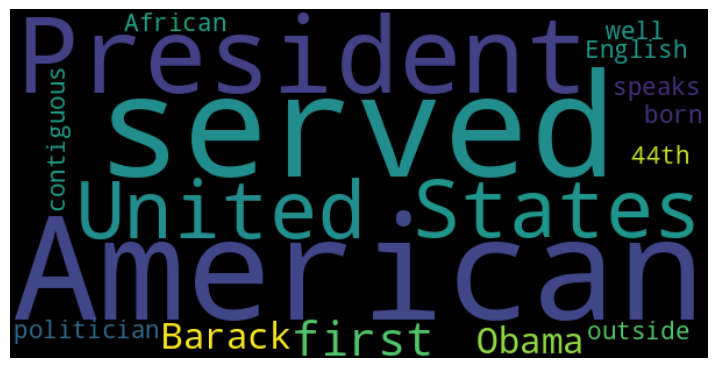

In [36]:
# ploting wordcloud 
import matplotlib.pyplot as plt
# create a figure
fig, ax = plt.subplots(1,1, figsize = (9,6))
# add interpolation = bilinear to smooth things out
plt.imshow(wordcloud, interpolation='bilinear')
# and remove the axis
plt.axis("off")

<a id="SentimentAnalysis"> </a>
### 10. Sentiment Analysis using Textblob 


In [37]:
from textblob import TextBlob

text = "I hate anything that goes in my ear"
textblob = TextBlob(text)

In [38]:
# fetching text sentiment polarity 
textblob.sentiment.polarity

-0.8

In [39]:
# fetching text sentiment subjectivity
textblob.sentiment.subjectivity

0.9

In [40]:
# function for analysis sentiment
# def getTextAnalysis(a):
#     if a < 0:
#         return "Negative"
#     elif a == 0:
#         return "Neutral"
#     else:
#         return "Positive" 
